# NewsAPI Data Cleaning
In our analysis, we collected data from News API over multiple days. For this reason, there are multiple csv files that were generated. The articles returned by the API calls change over time, so all csv files were included in this analysis to obtain the maximum number of unique headlines. 

## References
https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#run pip install nltk in your terminal with your PythonData environment activated if you have not already installed nltk
import nltk 
# nltk.download('vader_lexicon') <- you will need to run this the first time you run this code 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SID = SentimentIntensityAnalyzer()

## Merge CSV files into one DataFrame

In [2]:
# Read in CSV files and store in dataframes
df1 = pd.read_csv("Original_Data/final_cleaned_dataset.csv")
df2 = pd.read_csv("Original_Data/sentimentNewsAPIdataRCK_2020-11-16_immigration.csv")
df3 = pd.read_csv("Original_Data/sentimentNewsAPIdataRCK_2020-11-16_refugee(s).csv")
df4 = pd.read_csv("Original_Data/sentimentNewsAPIdataRCK_2020-11-18_immigrant.csv")
df5 = pd.read_csv("Original_Data/sentimentNewsAPIdataRCK_2020-11-18_immigrants.csv")
df6 = pd.read_csv("Original_Data/sentimentNewsAPIdataRCK_2020-11-18_migrant(s).csv")

In [3]:
# Combine all dataframes
df = pd.concat([df1, df2, df3, df4, df5, df6])
df

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score
0,immigrant,The Washington Post,Nick Miroff,Hospital where activists say ICE detainees wer...,https://www.washingtonpost.com/immigration/ice...,According to a complaint filed last week by im...,2020-09-22T20:10:00Z,0.0000,0.000,0.000,1.000
1,immigrant,The Washington Post,"Nick Miroff, Devlin Barrett",ICE preparing targeted arrests in ‘sanctuary c...,https://www.washingtonpost.com/immigration/tru...,"Chad Wolf, acting secretary of the Department ...",2020-09-29T22:37:00Z,-0.4404,0.182,0.000,0.818
2,immigrant,The Washington Post,Tim Elfrink,‘They’re still not taking this seriously’: Whi...,https://www.washingtonpost.com/nation/2020/09/...,Ms. Wootens whistleblowing disclosures confirm...,2020-09-15T10:39:00Z,-0.1531,0.198,0.126,0.676
3,immigrant,The Washington Post,"James A. McCann, Michael Jones-Correa",Trump’s attacks prompted Latino immigrants to ...,https://www.washingtonpost.com/politics/2020/1...,"How has all this affected Latino immigrants, t...",2020-10-01T11:00:12Z,-0.4404,0.195,0.000,0.805
4,immigrant,The Washington Post,Steven Moore,ICE is accused of sterilizing detainees. That ...,https://www.washingtonpost.com/politics/2020/0...,Forced sterilization in the U.S.\r\nSince the ...,2020-09-25T11:00:00Z,-0.6369,0.286,0.000,0.714
...,...,...,...,...,...,...,...,...,...,...,...
455,migrants,CNN,"Priscilla Alvarez and Christina Carrega, CNN",Senior administration officials on the road to...,https://www.cnn.com/2020/10/22/politics/wolf-b...,(CNN)In the run up to the presidential electio...,2020-10-22T21:59:47Z,NaN,NaN,NaN,NaN
456,migrants,CNN,"Stefano Pozzebon, CNN","After leaving Venezuela, one will vote for Tru...",https://www.cnn.com/2020/10/22/politics/us-ele...,(CNN)American politics have taken on a déjà-vu...,2020-10-22T10:00:28Z,NaN,NaN,NaN,NaN
457,migrants,CNN,"Priscilla Alvarez and Geneva Sands, CNN",Trump administration renews push to confirm Wo...,https://www.cnn.com/2020/11/13/politics/donald...,(CNN)There's a renewed push to get Chad Wolf c...,2020-11-13T13:01:15Z,NaN,NaN,NaN,NaN
458,migrants,CNN,"Sanam Mahoozi, Zahid Mahmood and Barbara Wojaz...","At least three dead, including children, after...",https://www.cnn.com/2020/10/27/europe/france-m...,"(CNN)At least three people have died, includin...",2020-10-27T21:28:28Z,NaN,NaN,NaN,NaN


## Remove duplicates and video headlines; identify missing data

In [4]:
# Remove duplicate titles
df_clean = df.drop_duplicates(subset = 'Title')
df_clean

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score
0,immigrant,The Washington Post,Nick Miroff,Hospital where activists say ICE detainees wer...,https://www.washingtonpost.com/immigration/ice...,According to a complaint filed last week by im...,2020-09-22T20:10:00Z,0.0000,0.000,0.000,1.000
1,immigrant,The Washington Post,"Nick Miroff, Devlin Barrett",ICE preparing targeted arrests in ‘sanctuary c...,https://www.washingtonpost.com/immigration/tru...,"Chad Wolf, acting secretary of the Department ...",2020-09-29T22:37:00Z,-0.4404,0.182,0.000,0.818
2,immigrant,The Washington Post,Tim Elfrink,‘They’re still not taking this seriously’: Whi...,https://www.washingtonpost.com/nation/2020/09/...,Ms. Wootens whistleblowing disclosures confirm...,2020-09-15T10:39:00Z,-0.1531,0.198,0.126,0.676
3,immigrant,The Washington Post,"James A. McCann, Michael Jones-Correa",Trump’s attacks prompted Latino immigrants to ...,https://www.washingtonpost.com/politics/2020/1...,"How has all this affected Latino immigrants, t...",2020-10-01T11:00:12Z,-0.4404,0.195,0.000,0.805
4,immigrant,The Washington Post,Steven Moore,ICE is accused of sterilizing detainees. That ...,https://www.washingtonpost.com/politics/2020/0...,Forced sterilization in the U.S.\r\nSince the ...,2020-09-25T11:00:00Z,-0.6369,0.286,0.000,0.714
...,...,...,...,...,...,...,...,...,...,...,...
443,migrants,Al Jazeera English,Khaled Diab,The automated path to social and ecological de...,https://www.aljazeera.com/opinions/2020/11/16/...,"In the mid-1980s, Max Headroom, a computer-gen...",2020-11-16T08:49:23Z,NaN,NaN,NaN,NaN
447,migrants,CNN,"Sharon Braithwaite and Eoin McSweeney, CNN",At least 140 people drown in the deadliest shi...,https://www.cnn.com/2020/10/29/africa/ship-wre...,NaN,2020-10-29T17:03:35Z,NaN,NaN,NaN,NaN
448,migrants,CNN,"Sharon Braithwaite, CNN",At least 74 migrants killed in shipwreck off L...,https://www.cnn.com/2020/11/12/africa/migrants...,NaN,2020-11-12T18:04:18Z,NaN,NaN,NaN,NaN
454,migrants,CNN,"Harmeet Kaur, CNN","5 things to know for November 13: Covid, trans...",https://www.cnn.com/2020/11/13/us/five-things-...,"(CNN)Not only is today Friday the 13th, it's a...",2020-11-13T11:09:28Z,NaN,NaN,NaN,NaN


In [5]:
# Check for any additional duplicates by looking at text
df_check = df_clean[df_clean.duplicated(subset='Text')]
df_check.sort_values(by='Title')

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score
146,immigrants,MSNBC,MSNBC.com,'It’s an unbelievable situation': Pro-bono gro...,https://www.msnbc.com/american-voices/watch/-i...,NaN,2020-10-25T00:00:01Z,NaN,NaN,NaN,NaN
177,refugee,CNN,"Priscilla Alvarez, CNN",'We had a shortage last night of beds for babi...,https://www.cnn.com/2020/10/29/politics/family...,NaN,2020-10-29T13:00:10Z,NaN,NaN,NaN,NaN
88,migrant,CBS News,CBS News,A closer look at how Trump's policies have aff...,https://www.cbsnews.com/video/a-closer-look-at...,Watch CBSN Live\r\nCopyright © 2020 CBS Intera...,2020-11-01T23:26:42Z,NaN,NaN,NaN,NaN
89,migrant,CBS News,CBS News,ACLU filing: Parents of 545 separated migrant ...,https://www.cbsnews.com/video/aclu-filing-pare...,Watch CBSN Live\r\nCopyright © 2020 CBS Intera...,2020-10-21T15:07:58Z,NaN,NaN,NaN,NaN
247,migrants,USA Today,"AP Domestic, AP",AP Top Stories November 11 P,https://www.usatoday.com/videos/news/nation/20...,NaN,2020-11-11T22:27:18Z,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
460,immigration,Bloomberg,NaN,Trump: We're Trying to Reunite Kids Separated ...,https://www.bloomberg.com/news/videos/2020-10-...,NaN,2020-10-23T03:12:07Z,NaN,NaN,NaN,NaN
143,immigrants,MSNBC,MSNBC.com,Tucson mayor ahead of Trump’s visit: We're not...,https://www.msnbc.com/ali-velshi/watch/tucson-...,NaN,2020-10-18T16:36:04Z,NaN,NaN,NaN,NaN
524,immigration,CNN,NaN,"Van Jones: Trump did his best ever, and his be...",https://www.cnn.com/videos/politics/2020/10/22...,NaN,2020-10-23T03:16:37Z,NaN,NaN,NaN,NaN
144,immigrants,MSNBC,MSNBC.com,Women of color leaders on historic import of V...,https://www.msnbc.com/am-joy/watch/kamala-harr...,NaN,2020-11-08T21:36:54Z,NaN,NaN,NaN,NaN


In [6]:
# We are missing some text entries and some authors
df_clean.count()

Keyword           2784
Source            2784
Author            2759
Title             2783
URL               2784
Text              2732
Published         2784
compound score    1477
negative score    1477
positive score    1477
neutral score     1477
dtype: int64

In [7]:
# Drop Text column duplicates since they are videos which we aren't interested in 
df_clean_2 = df_clean.drop_duplicates(subset='Text', keep=False)
df_clean_3 = df_clean_2.dropna(subset=['Title', 'Text'])

# Sentiment analysis is missing for many headlines, so create new df without sentiment analysis
df_clean_4 = df_clean_3[['Keyword', 'Source', 'Author', 'Title', 'URL', 'Text', 'Published']].copy()

In [10]:
# Perform sentiment analysis on all headlines
df_clean_4['compound score'] = df_clean_4['Title'].apply(lambda title: SID.polarity_scores(title)['compound'])
df_clean_4['negative score'] = df_clean_4['Title'].apply(lambda title: SID.polarity_scores(title)['neg'])
df_clean_4['positive score'] = df_clean_4['Title'].apply(lambda title: SID.polarity_scores(title)['pos'])
df_clean_4['neutral score'] = df_clean_4['Title'].apply(lambda title: SID.polarity_scores(title)['neu'])

In [11]:
# Do not have authors for all articles but this is not relevant to current analysis
df_clean_4.count()

Keyword           2711
Source            2711
Author            2694
Title             2711
URL               2711
Text              2711
Published         2711
compound score    2711
negative score    2711
positive score    2711
neutral score     2711
dtype: int64

In [12]:
# Preview dataframe
df_clean_4.head()

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score
0,immigrant,The Washington Post,Nick Miroff,Hospital where activists say ICE detainees wer...,https://www.washingtonpost.com/immigration/ice...,According to a complaint filed last week by im...,2020-09-22T20:10:00Z,0.0000,0.000,0.000,1.000
1,immigrant,The Washington Post,"Nick Miroff, Devlin Barrett",ICE preparing targeted arrests in ‘sanctuary c...,https://www.washingtonpost.com/immigration/tru...,"Chad Wolf, acting secretary of the Department ...",2020-09-29T22:37:00Z,-0.4404,0.182,0.000,0.818
2,immigrant,The Washington Post,Tim Elfrink,‘They’re still not taking this seriously’: Whi...,https://www.washingtonpost.com/nation/2020/09/...,Ms. Wootens whistleblowing disclosures confirm...,2020-09-15T10:39:00Z,-0.1531,0.198,0.126,0.676
3,immigrant,The Washington Post,"James A. McCann, Michael Jones-Correa",Trump’s attacks prompted Latino immigrants to ...,https://www.washingtonpost.com/politics/2020/1...,"How has all this affected Latino immigrants, t...",2020-10-01T11:00:12Z,-0.4404,0.195,0.000,0.805
4,immigrant,The Washington Post,Steven Moore,ICE is accused of sterilizing detainees. That ...,https://www.washingtonpost.com/politics/2020/0...,Forced sterilization in the U.S.\r\nSince the ...,2020-09-25T11:00:00Z,-0.6369,0.286,0.000,0.714


## Review source distribution

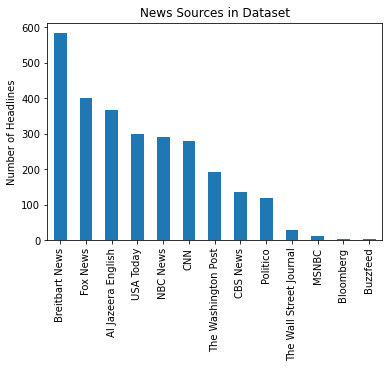

In [13]:
# Graph number of headlines per news source and notice with this dataset that some news sources were not well represented
source_count = df_clean_4['Source'].value_counts()
source_count.plot.bar()
plt.title('News Sources in Dataset')
plt.ylabel('Number of Headlines')
plt.show()

In [14]:
# Determine how many headlines there are per source
source_count
source_count_df = pd.DataFrame(source_count).reset_index().rename(columns={'index': 'Source', 'Source':'Source Count'})
source_count_df

,Source,Source Count
0,Breitbart News,584
1,Fox News,400
2,Al Jazeera English,367
3,USA Today,300
4,NBC News,290
5,CNN,279
6,The Washington Post,193
7,CBS News,136
8,Politico,118
9,The Wall Street Journal,28


In [15]:
# Merge source count with dataframe
df_merged = pd.merge(df_clean_4, source_count_df, on='Source')
df_merged.head()

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score,Source Count
0,immigrant,The Washington Post,Nick Miroff,Hospital where activists say ICE detainees wer...,https://www.washingtonpost.com/immigration/ice...,According to a complaint filed last week by im...,2020-09-22T20:10:00Z,0.0000,0.000,0.000,1.000,193
1,immigrant,The Washington Post,"Nick Miroff, Devlin Barrett",ICE preparing targeted arrests in ‘sanctuary c...,https://www.washingtonpost.com/immigration/tru...,"Chad Wolf, acting secretary of the Department ...",2020-09-29T22:37:00Z,-0.4404,0.182,0.000,0.818,193
2,immigrant,The Washington Post,Tim Elfrink,‘They’re still not taking this seriously’: Whi...,https://www.washingtonpost.com/nation/2020/09/...,Ms. Wootens whistleblowing disclosures confirm...,2020-09-15T10:39:00Z,-0.1531,0.198,0.126,0.676,193
3,immigrant,The Washington Post,"James A. McCann, Michael Jones-Correa",Trump’s attacks prompted Latino immigrants to ...,https://www.washingtonpost.com/politics/2020/1...,"How has all this affected Latino immigrants, t...",2020-10-01T11:00:12Z,-0.4404,0.195,0.000,0.805,193
4,immigrant,The Washington Post,Steven Moore,ICE is accused of sterilizing detainees. That ...,https://www.washingtonpost.com/politics/2020/0...,Forced sterilization in the U.S.\r\nSince the ...,2020-09-25T11:00:00Z,-0.6369,0.286,0.000,0.714,193


In [16]:
# Create dataframe that drops any sources that have fewer than 50 headlines
df_cleaned_sources = df_merged[df_merged['Source Count'] >= 50]
df_final = df_cleaned_sources.drop(columns=['Source Count'])

In [17]:
# See which sources are still in the dataset
df_final['Source'].unique()

array(['The Washington Post', 'Politico', 'NBC News', 'Fox News',
       'CBS News', 'Breitbart News', 'Al Jazeera English', 'USA Today',
       'CNN'], dtype=object)

In [18]:
# Saved cleaned dataframe to csv for further analysis
df_final.to_csv('final_dataset.csv', index=False)
df_final

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score
0,immigrant,The Washington Post,Nick Miroff,Hospital where activists say ICE detainees wer...,https://www.washingtonpost.com/immigration/ice...,According to a complaint filed last week by im...,2020-09-22T20:10:00Z,0.0000,0.000,0.000,1.000
1,immigrant,The Washington Post,"Nick Miroff, Devlin Barrett",ICE preparing targeted arrests in ‘sanctuary c...,https://www.washingtonpost.com/immigration/tru...,"Chad Wolf, acting secretary of the Department ...",2020-09-29T22:37:00Z,-0.4404,0.182,0.000,0.818
2,immigrant,The Washington Post,Tim Elfrink,‘They’re still not taking this seriously’: Whi...,https://www.washingtonpost.com/nation/2020/09/...,Ms. Wootens whistleblowing disclosures confirm...,2020-09-15T10:39:00Z,-0.1531,0.198,0.126,0.676
3,immigrant,The Washington Post,"James A. McCann, Michael Jones-Correa",Trump’s attacks prompted Latino immigrants to ...,https://www.washingtonpost.com/politics/2020/1...,"How has all this affected Latino immigrants, t...",2020-10-01T11:00:12Z,-0.4404,0.195,0.000,0.805
4,immigrant,The Washington Post,Steven Moore,ICE is accused of sterilizing detainees. That ...,https://www.washingtonpost.com/politics/2020/0...,Forced sterilization in the U.S.\r\nSince the ...,2020-09-25T11:00:00Z,-0.6369,0.286,0.000,0.714
...,...,...,...,...,...,...,...,...,...,...,...
2662,migrant,CNN,"Alex Rogers, CNN",Democrats aim to flip Senate after 6 years of ...,https://www.cnn.com/2020/11/03/politics/senate...,"(CNN)After six years of Republican rule, the S...",2020-11-03T23:01:10Z,0.0000,0.000,0.000,1.000
2663,migrant,CNN,"Opinion by Richard Galant, CNN",America delivers its verdict on Donald Trump,https://www.cnn.com/2020/11/08/opinions/americ...,Sign up to get our new weekly column as a news...,2020-11-08T12:40:59Z,0.1531,0.000,0.211,0.789
2664,migrant,CNN,"Priscilla Alvarez, CNN",Federal judge says US can't turn away unaccomp...,https://www.cnn.com/2020/11/18/politics/unacco...,Washington (CNN)A federal judge has blocked th...,2020-11-18T18:41:59Z,0.0000,0.000,0.000,1.000
2665,migrants,CNN,"Harmeet Kaur, CNN","5 things to know for November 13: Covid, trans...",https://www.cnn.com/2020/11/13/us/five-things-...,"(CNN)Not only is today Friday the 13th, it's a...",2020-11-13T11:09:28Z,0.0000,0.000,0.000,1.000
